## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [166]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import scipy.stats as stats
from math import sqrt
import numpy as np
from numbers import Number
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import folium
df = pd.read_csv('data/kc_house_data.csv')
df_names = pd.read_table('data/column_names.md')

In [307]:

import geopandas as gpd 
from shapely.geometry import Point,Polygon
%matplotlib inline 
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [265]:
map = df 
map_2 = gpd.GeoDataFrame(map,geometry=gpd.points_from_xy(map.lat,map.long))

In [293]:
zip_code_test = map_2[['zipcode','geometry']][:20]

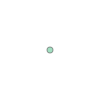

In [461]:
zip_code_test['geometry'][1]

In [ ]:
#date is the date the house was sold 

In [308]:
df["date"]=pd.to_datetime(df['date'])

In [167]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [468]:
import folium
lat = df['lat'].iloc[:600]
long = df['long'].iloc[:600]
price = df['price'].iloc[:600]

#Create a map of the area
base_map = folium.Map([lat.mean(), long.mean()], zoom_start=13)
i=0
for lat1,long1 in zip(lat,long):
     popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1) #Modify this to change marker popup
     popup = folium.Popup(popup_text, parse_html=True)
     marker = folium.Marker(location=[lat1, long1], popup = popup)
     marker.add_to(base_map)
     i+=1
     
base_map

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

In [355]:

#test = df[['price','zipcode','sqft_living','grade','bedrooms','bathrooms']].copy()
#test.dropna(inplace=True)
#test.sort_values(by='price',ascending = False)


In [172]:
df.dropna(inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

In [171]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [174]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [374]:
df_new = df.drop(columns=['sqft_above','sqft_living15','sqft_lot15','grade','id','sqft_basement'])

In [396]:
df_new['yr_renovated']= df_new['yr_renovated'].astype(int)

In [415]:
df_new['yr_renovated'].value_counts()

0       15111
2014       64
2013       29
2005       27
2000       25
        ...  
1967        1
1934        1
1944        1
1950        1
1974        1
Name: yr_renovated, Length: 70, dtype: int64

In [421]:
df_new

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,geometry
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,4,0,1951,1991,98125,47.7210,-122.319,POINT (47.721 -122.319)
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,0,98136,47.5208,-122.393,POINT (47.521 -122.393)
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,4,0,1987,0,98074,47.6168,-122.045,POINT (47.617 -122.045)
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,4,0,2001,0,98053,47.6561,-122.005,POINT (47.656 -122.005)
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,4,0,1995,0,98003,47.3097,-122.327,POINT (47.310 -122.327)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,1294,2.0,0,4,0,2008,0,98116,47.5773,-122.409,POINT (47.577 -122.409)
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,4,0,2009,0,98103,47.6993,-122.346,POINT (47.699 -122.346)
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,4,0,2014,0,98146,47.5107,-122.362,POINT (47.511 -122.362)
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,4,0,2009,0,98144,47.5944,-122.299,POINT (47.594 -122.299)


In [403]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          15762 non-null  datetime64[ns]
 1   price         15762 non-null  float64       
 2   bedrooms      15762 non-null  int64         
 3   bathrooms     15762 non-null  float64       
 4   sqft_living   15762 non-null  int64         
 5   sqft_lot      15762 non-null  int64         
 6   floors        15762 non-null  float64       
 7   waterfront    15762 non-null  object        
 8   view          15762 non-null  object        
 9   condition     15762 non-null  object        
 10  yr_built      15762 non-null  int64         
 11  yr_renovated  15762 non-null  int64         
 12  zipcode       15762 non-null  int64         
 13  lat           15762 non-null  float64       
 14  long          15762 non-null  float64       
 15  geometry      15762 non-null  geomet

In [399]:
#DEFINE the catgory coulmns unique values to transfer them to dummy columns 
df_new['waterfront'].unique()


array(['NO', 'YES'], dtype=object)

In [400]:
df_new['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [ ]:
#col.f <- factor(column,
            #levels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
           # labels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
            #ordered = TRUE)

In [401]:
df_new['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [ ]:
#ASK ALEX IF YOU CAN RE SORT THE VAULES IN THE CATGORIES COULMN AS ABOVE 

In [ ]:
#switched the catgries coulmns to numeric! 

In [405]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].astype('category')

In [406]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].cat.codes
    

In [407]:
df_new['view'].unique()
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2

array([4, 3, 1, 0, 2], dtype=int8)

In [460]:
df_new.sort_values(by = 'view')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,geometry
1842,2015-04-13,580000.0,3,2.50,1740,1280,3.0,0,0,0,2008,0,98116,47.5890,-122.387,POINT (47.589 -122.387)
10588,2014-09-09,783200.0,4,2.00,1590,5400,1.0,0,0,0,1900,0,98119,47.6370,-122.367,POINT (47.637 -122.367)
20749,2015-05-11,770000.0,5,3.50,4750,8234,2.0,0,0,0,2013,0,98198,47.3574,-122.318,POINT (47.357 -122.318)
14734,2014-05-27,967500.0,3,3.75,3250,5797,2.0,0,0,2,1951,0,98199,47.6481,-122.405,POINT (47.648 -122.405)
10581,2014-10-16,951250.0,5,3.00,2710,8227,1.0,0,0,0,1953,0,98199,47.6505,-122.390,POINT (47.651 -122.390)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7598,2015-02-19,518000.0,4,3.00,2430,11670,1.0,0,4,2,1978,0,98034,47.7307,-122.228,POINT (47.731 -122.228)
7600,2015-02-26,430000.0,3,2.50,1690,1310,2.0,0,4,0,2004,0,98136,47.5404,-122.387,POINT (47.540 -122.387)
7603,2014-11-07,449000.0,3,1.75,1270,6600,1.5,0,4,4,1903,0,98144,47.5976,-122.295,POINT (47.598 -122.295)
7583,2014-07-14,390000.0,3,2.25,1640,2875,2.0,0,4,0,1983,0,98118,47.5686,-122.286,POINT (47.569 -122.286)


In [408]:
df_new['waterfront'].unique()
##WATERFRONT = 0:NO 1:YES 

array([0, 1], dtype=int8)

In [409]:
df_new['condition'].unique()
#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]



array([0, 4, 2, 3, 1], dtype=int8)

In [410]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          15762 non-null  datetime64[ns]
 1   price         15762 non-null  float64       
 2   bedrooms      15762 non-null  int64         
 3   bathrooms     15762 non-null  float64       
 4   sqft_living   15762 non-null  int64         
 5   sqft_lot      15762 non-null  int64         
 6   floors        15762 non-null  float64       
 7   waterfront    15762 non-null  int8          
 8   view          15762 non-null  int8          
 9   condition     15762 non-null  int8          
 10  yr_built      15762 non-null  int64         
 11  yr_renovated  15762 non-null  int64         
 12  zipcode       15762 non-null  int64         
 13  lat           15762 non-null  float64       
 14  long          15762 non-null  float64       
 15  geometry      15762 non-null  geomet

In [411]:
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,geometry
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,4,0,1951,1991,98125,47.7210,-122.319,POINT (47.721 -122.319)
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,0,98136,47.5208,-122.393,POINT (47.521 -122.393)
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,4,0,1987,0,98074,47.6168,-122.045,POINT (47.617 -122.045)
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,4,0,2001,0,98053,47.6561,-122.005,POINT (47.656 -122.005)
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,4,0,1995,0,98003,47.3097,-122.327,POINT (47.310 -122.327)


In [434]:
df_new.corr()["price"]

price           1.000000
bedrooms        0.305489
bathrooms       0.526155
sqft_living     0.706189
sqft_lot        0.084504
floors          0.259505
waterfront      0.274212
view           -0.313494
condition       0.021681
yr_built        0.049345
yr_renovated    0.122731
zipcode        -0.049502
lat             0.306607
long            0.021215
Name: price, dtype: float64

In [448]:
df_new['price'].describe()
#THERE ARE 129 HOUSES IN THE MAX PRICE IN THE PRICE OF $77,00000.0
# the cheapest house is $82,000
#THE MEAN IS $5.4 


count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64

In [451]:
df_new['yr_built'].describe()

count    15762.000000
mean      1971.111217
std         29.336823
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [454]:
df_new['yr_renovated'].value_counts() ###need to do only above year 2000 via year built via zip code via price ##

0       15111
2014       64
2013       29
2005       27
2000       25
        ...  
1967        1
1934        1
1944        1
1950        1
1974        1
Name: yr_renovated, Length: 70, dtype: int64

In [456]:
#df.loc[df['alcohol'] < 12]
df_new.loc[df_new['yr_renovated']>2000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,geometry
35,2014-06-13,696000.0,3,2.50,2300,3060,1.5,0,4,0,1930,2002,98115,47.6827,-122.310,POINT (47.683 -122.310)
103,2014-10-07,1090000.0,3,2.50,2920,8113,2.0,0,4,0,1950,2010,98004,47.5814,-122.196,POINT (47.581 -122.196)
158,2014-11-13,247000.0,3,2.00,1270,7198,1.5,0,4,0,1916,2013,98022,47.2086,-121.996,POINT (47.209 -121.996)
237,2015-03-20,410000.0,4,1.00,1970,4740,1.5,0,4,0,1904,2005,98122,47.6136,-122.303,POINT (47.614 -122.303)
274,2014-11-24,331000.0,3,1.75,1080,1306,1.0,0,4,0,1954,2003,98199,47.6601,-122.400,POINT (47.660 -122.400)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19577,2014-11-04,257000.0,3,1.75,1397,18000,1.0,0,4,0,1965,2014,98092,47.3388,-122.166,POINT (47.339 -122.166)
19602,2014-07-12,451000.0,2,1.00,900,6000,1.0,0,4,0,1944,2004,98115,47.6855,-122.289,POINT (47.685 -122.289)
20041,2014-09-04,434900.0,3,2.00,1520,5040,2.0,0,4,0,1977,2006,98177,47.7770,-122.362,POINT (47.777 -122.362)
20428,2015-02-25,500012.0,4,2.50,2400,9612,1.0,0,4,0,1962,2009,98059,47.4799,-122.127,POINT (47.480 -122.127)


In [ ]:
#CHECKING LINER REGERSSION 

In [413]:
df_numeric = df_new.groupby(['zipcode']).mean()
# once i groupby the zip code the data normalize 


In [427]:
df_numeric.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,lat,long
zipcode,,,,,,,,,,,,,
98001,2.716920e+05,3.352941,1.995098,1861.109804,14461.015686,1.401961,0.000000,3.913725,0.709804,1980.482353,31.227451,47.308339,-122.269933
98002,2.339240e+05,3.295302,1.832215,1611.577181,7450.489933,1.332215,0.000000,4.000000,1.449664,1968.107383,66.677852,47.309665,-122.212725
98003,2.882728e+05,3.336406,2.048387,1905.082949,10471.493088,1.315668,0.000000,3.691244,0.718894,1977.963134,9.267281,47.316278,-122.309535
98004,1.367456e+06,3.896104,2.577922,2969.480519,13321.523810,1.467532,0.004329,3.614719,1.012987,1971.476190,225.051948,47.615404,-122.204762
98005,8.131688e+05,3.860465,2.391473,2672.868217,19480.891473,1.244186,0.000000,3.868217,1.434109,1967.883721,46.472868,47.611235,-122.168039


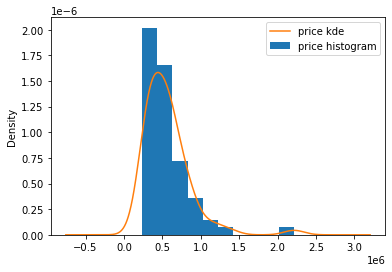

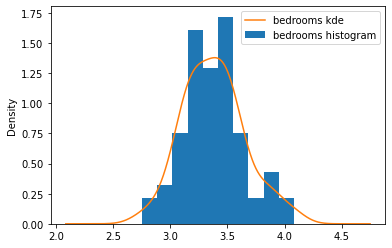

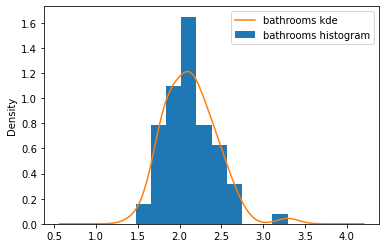

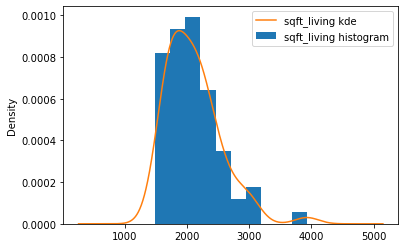

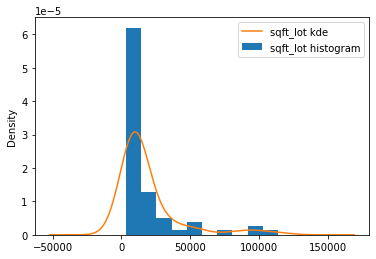

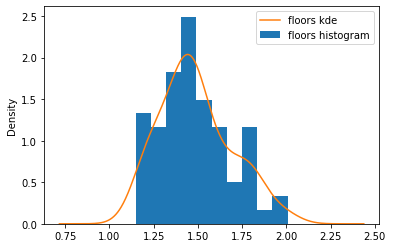

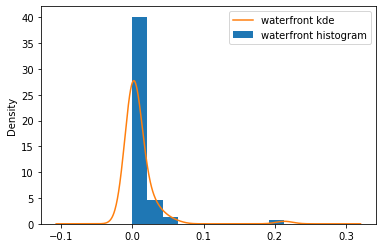

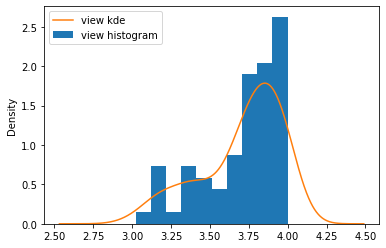

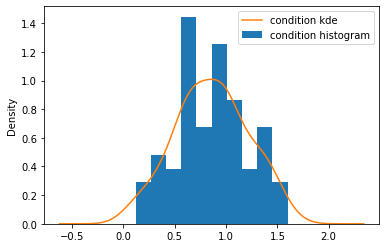

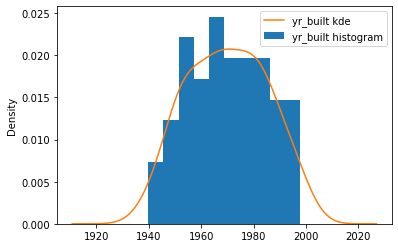

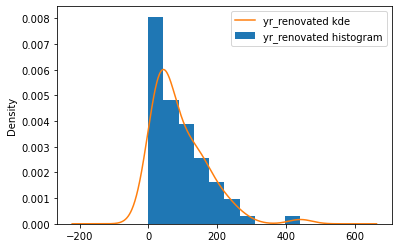

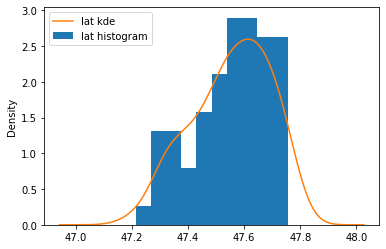

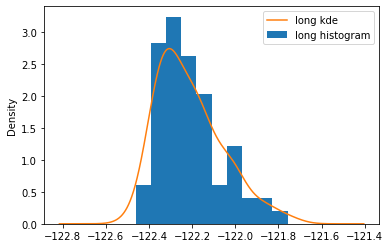

In [428]:
for column in df_numeric:
    df_numeric[column].plot.hist(density=True, label = column + ' histogram')
    df_numeric[column].plot.kde(label = column + ' kde')
    plt.legend()
    plt.show()

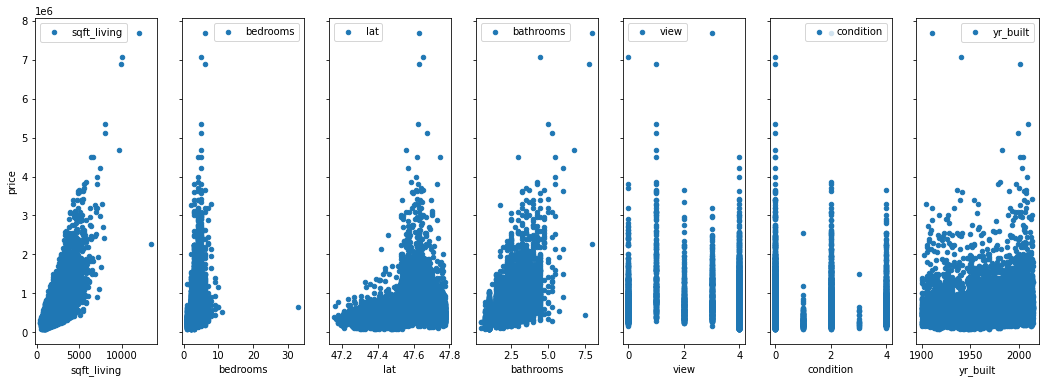

In [433]:
fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'bedrooms', 'lat','bathrooms','view','condition','yr_built']):
    df_new.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2